In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


In [2]:
# 색상을 표현하는 방법
flags = [i for i in dir(cv) if i.startswith('COLOR_')]
print( flags )

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_BGGR2BGR', 'COLOR_BAYER_BGGR2BGRA', 'COLOR_BAYER_BGGR2BGR_EA', 'COLOR_BAYER_BGGR2BGR_VNG', 'COLOR_BAYER_BGGR2GRAY', 'COLOR_BAYER_BGGR2RGB', 'COLOR_BAYER_BGGR2RGBA', 'COLOR_BAYER_BGGR2RGB_EA', 'COLOR_BAYER_BGGR2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GBRG2BGR', 'COLOR_BAYER_GBRG2BGRA', 'COLOR_BAYER_GBRG2BGR_EA', 'COLOR_BAYER_GBRG2BGR_VNG', 'COLOR_BAYER_GBRG2GRAY', 'COLOR_BAYER_GBRG2RGB', 'COLOR_BAYER_GBRG2RGBA', 'COLOR_BAYER_GBRG2RGB_EA', 'COLOR_BAYER_GBRG2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_

In [5]:
# 주의해야 할 부분
# 포화 범위는 0 ~ 255 이지만, HSV에서 색상의(hue) 범위는 0 ~ 179 !
# RGB 이미지를 HSV 이미지로 변경하면 특정 색상을 가진 객체 식별이 가능함
# https://alloyui.com/examples/color-picker/hsv.html

cap = cv.VideoCapture(0)
while(1):
    # 프레임 읽어오기
    _, frame = cap.read()
    
    # BGR에서 HSV로 변환
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    
    # HSV 내에서 파랑색 범위를 정의
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])
    
    # 파랑색 색상만 구하기 위해 HSV 이미지를 경계선으로 구분
    mask = cv.inRange(hsv, lower_blue, upper_blue)
    
    # 오리지널 이미지에 AND mask 연산 적용
    res = cv.bitwise_and(frame, frame, mask= mask)
    
    cv.imshow('frame',frame)
    cv.imshow('mask', mask)
    cv.imshow('res',res)
    
    k = cv.waitKey(5) & 0xFF
    if k == 27:
        break
        
cv.destroyAllWindows()

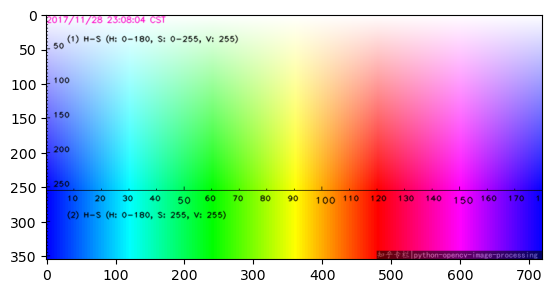

In [6]:
hsv_table = cv.imread('../samples/hsv.png')
plt.imshow(hsv_table)

In [7]:
# 빨강색만 식별하도록 만들어 보기!

cap = cv.VideoCapture(0)

while(1):
    _, frame = cap.read()
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)

    # lower boundary RED color range values; Hue (0 - 10)
    lower1 = np.array([0, 100, 20])
    upper1 = np.array([10, 255, 255])

    # upper boundary RED color range values; Hue (160 - 180)
    lower2 = np.array([160,100,20])
    upper2 = np.array([179,255,255])

    lower_mask = cv.inRange(hsv, lower1, upper1)
    upper_mask = cv.inRange(hsv, lower2, upper2)
    
    full_mask = lower_mask + upper_mask
    
    res = cv.bitwise_and(frame, frame, mask= full_mask)
    
    cv.imshow('frame',frame)
    cv.imshow('mask', mask)
    cv.imshow('res',res)
    
    k = cv.waitKey(5) & 0xFF
    if k == 27:
        break
        
cv.destroyAllWindows()

In [8]:
# 색상코드 찾는게 어렵다면?! 
green = np.uint8([[[0,255,0 ]]])
hsv_green = cv.cvtColor(green,cv.COLOR_BGR2HSV)
hsv_green

# (h-10, 100, 100) ~ (h+10, 255, 255)
# green range = (50, 100, 100) ~ (70, 255, 255)

array([[[ 60, 255, 255]]], dtype=uint8)

In [9]:
cap.release()